# Instituto Tecnológico y de Estudios Superiores de Monterrey
Maestría en Inteligencia Artificial Aplicada
Ciencia y analítica de datos 
TC4029.10

# Actividad Semanal 4
# Modulo 3

Alumnos:

**Adriana Fernanda Jiménez Avalos A01087695**

**Luis Alfredo Negron Naldos A01793865**

Profesores:	
Profesor titular: Jobish Vallikavungal
Profesor asistente: Juan Miguel Meza Méndez  

Maestría Virtual, 11 Oct 2022

# **Parte 1: Ejercicio guiado**

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
import pandas as pd #librerias
import numpy as np
ruta ='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df= pd.read_csv(ruta) 
df

cdf=df.copy() #para no modificar original
cdf

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
#renombrar los campos con categoria respectiva
ncdf=cdf.rename(columns={'X1':'MontCred','X2':'Gen','X3':'Edu','X4':'StaMar','X5':'Edad','X6':'MPSep','X7':'MPAg','X8':'MPJul','X9':'MPJun','X10':'MPMay','X11':'MPAbr', 'X12':'BSSep', 'X13':'BSAg', 'X14':'BSJul','X15':'BSJun','X16':'BSMay','X17':'BSAbr','X18':'PPSep','X19':'PPAg','X20':'PPJul','X21':'PPJun','X22':'PPMay','X23':'PPAbr'})

In [ ]:
ncdf

,ID,MontCred,Gen,Edu,StaMar,Edad,MPSep,MPAg,MPJul,MPJun,...,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
#proceder a eliminar filas con valores faltantes
ncdf.dropna(axis='index', how='all', subset=['Edu','Edad'], inplace= True) #eliminara solo cuando la hilera entera no tenga valores en edu y edad. Es importante agrega inplace para que salve el cambie
ncdf

,ID,MontCred,Gen,Edu,StaMar,Edad,MPSep,MPAg,MPJul,MPJun,...,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
ncdf.fillna(0, inplace=True) #todos los lados de NA que sean 0, para futuros calculos

In [ ]:
ncdf.dropna(axis=0, inplace=True) #eliminar todos los valores vacios para poder aplicar PCA

In [ ]:
ncdf2 = ncdf.drop(['Gen','StaMar'], axis = 1)
ncdf2

,ID,MontCred,Edu,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,...,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr,Y
0,1,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,3.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
ncdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29998 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        29998 non-null  int64  
 1   MontCred  29998 non-null  int64  
 2   Edu       29998 non-null  float64
 3   Edad      29998 non-null  float64
 4   MPSep     29998 non-null  float64
 5   MPAg      29998 non-null  float64
 6   MPJul     29998 non-null  float64
 7   MPJun     29998 non-null  float64
 8   MPMay     29998 non-null  float64
 9   MPAbr     29998 non-null  float64
 10  BSSep     29998 non-null  float64
 11  BSAg      29998 non-null  float64
 12  BSJul     29998 non-null  float64
 13  BSJun     29998 non-null  float64
 14  BSMay     29998 non-null  float64
 15  BSAbr     29998 non-null  float64
 16  PPSep     29998 non-null  float64
 17  PPAg      29998 non-null  float64
 18  PPJul     29998 non-null  float64
 19  PPJun     29998 non-null  float64
 20  PPMay     29998 non-null  fl

In [ ]:
ncdf2_num = ncdf2.iloc[:,2:]
ncdf2_num = ncdf2_num.drop(columns=["Y", "Edu", ])
ncdf2_num.head()
#Nota: La Y no debería ser incluida en la base de datos al ser una variable dependiente en el modelo... 

,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
ncdf2_num.describe()

,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,2.999800e+04,29998.000000,29998.000000,29998.000000,29998.000000,2.999800e+04,29998.000000,29998.000000,29998.000000,29998.000000
mean,35.480665,-0.016634,-0.133676,-0.166378,-0.220748,-0.266218,-0.291019,51221.490666,49175.976465,4.700811e+04,43256.898293,40304.330389,38870.062704,5661.760351,5.921061e+03,5224.522768,4825.634042,4798.822021,5215.725315
std,9.224391,1.123810,1.197195,1.195950,1.169021,1.133047,1.149918,73639.517119,71177.804241,6.935399e+04,64337.860703,60801.462718,59557.088777,16562.717569,2.304168e+04,17606.830431,15666.649009,15278.785513,17778.039502
min,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3556.000000,2976.250000,2.655500e+03,2315.250000,1759.000000,1253.250000,1000.000000,8.320000e+02,390.000000,293.250000,249.000000,116.000000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22375.000000,21191.500000,2.008450e+04,19037.000000,18093.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67093.000000,64010.750000,6.016625e+04,54512.000000,50179.000000,49202.750000,5006.000000,5.000000e+03,4504.750000,4012.750000,4031.000000,4000.000000
max,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [ ]:
ncdf2_num.corr()

,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
Edad,1.000000,-0.039304,-0.050070,-0.052964,-0.049680,-0.053596,-0.048593,0.056352,0.054240,0.053664,0.051269,0.049209,0.047662,0.025451,0.021656,0.029052,0.021260,0.022354,0.019400
MPSep,-0.039304,1.000000,0.672132,0.574453,0.538835,0.509271,0.474497,0.186985,0.189791,0.179662,0.179006,0.180501,0.176906,-0.079258,-0.070111,-0.070477,-0.064004,-0.058160,-0.058697
MPAg,-0.050070,0.672132,1.000000,0.766738,0.662086,0.622716,0.575356,0.234824,0.235208,0.224044,0.222128,0.221142,0.219329,-0.080704,-0.059001,-0.055832,-0.046866,-0.037039,-0.036525
MPJul,-0.052964,0.574453,0.766738,1.000000,0.776619,0.685995,0.632012,0.208644,0.237449,0.227590,0.227277,0.225143,0.222407,0.001164,-0.066807,-0.053313,-0.046051,-0.035838,-0.035867
MPJun,-0.049680,0.538835,0.662086,0.776619,1.000000,0.819932,0.716586,0.202846,0.225854,0.245005,0.245931,0.242845,0.239170,-0.009348,-0.001928,-0.069192,-0.043430,-0.033627,-0.026554
MPMay,-0.053596,0.509271,0.622716,0.685995,0.819932,1.000000,0.816815,0.206527,0.226749,0.243153,0.271691,0.269479,0.262296,-0.006123,-0.003216,0.008995,-0.058298,-0.033368,-0.023032
MPAbr,-0.048593,0.474497,0.575356,0.632012,0.716586,0.816815,1.000000,0.207247,0.226794,0.241044,0.266186,0.290583,0.284955,-0.001544,-0.005242,0.005773,0.019007,-0.046446,-0.025319
BSSep,0.056352,0.186985,0.234824,0.208644,0.202846,0.206527,0.207247,1.000000,0.951487,0.892257,0.860271,0.829775,0.802661,0.140330,0.099368,0.156945,0.158334,0.167063,0.179343
BSAg,0.054240,0.189791,0.235208,0.237449,0.225854,0.226749,0.226794,0.951487,1.000000,0.928319,0.892476,0.859770,0.831603,0.280412,0.100865,0.150759,0.147433,0.157991,0.174262
BSJul,0.053664,0.179662,0.224044,0.227590,0.245005,0.243153,0.241044,0.892257,0.928319,1.000000,0.923958,0.883900,0.853331,0.244402,0.316949,0.130071,0.143446,0.179758,0.182338


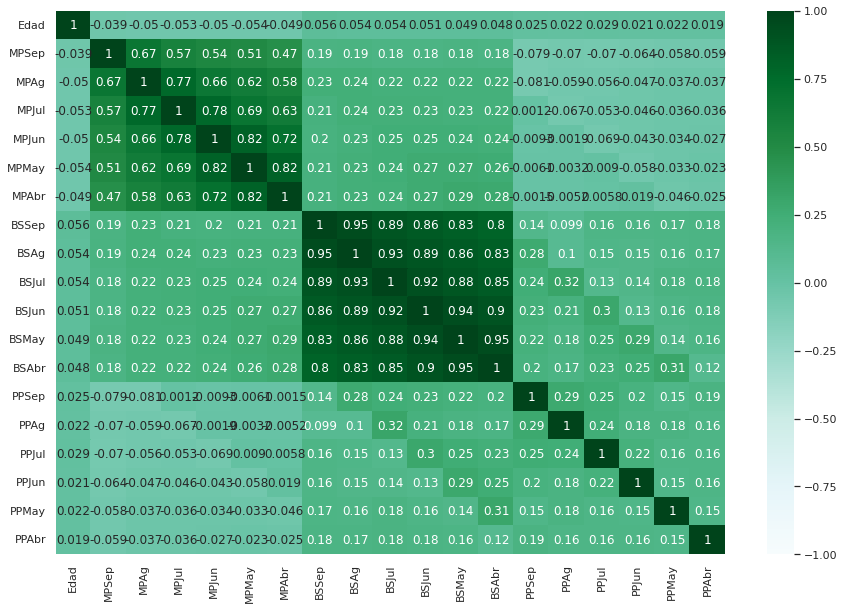

In [ ]:
import seaborn as sns
corrs = ncdf2_num.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

Verde oscuro son casillas mas correlacionadas.
Mientras mas oscuro sea el verde es mas estrecha la correlacion positiva.

Entre mas blanca la casilla mas estrecha es con correlacion negativa

Correlacion cero verde claro significa no hay correlacion.

***El tener variables correlacionados significa para el modelo informacion repetida y por ende que el modelo puede ser reducido***

In [ ]:
#varianzas de algunas variables
lvar = ["BSSep", "BSAbr"] #lista de variables por analizar
summary = {
"Varianzas": ncdf2_num[lvar].var()[0:3],
"Valor Min": ncdf2_num[lvar].min()[0:3],
"Valor Max": ncdf2_num[lvar].max()[0:3]
}
pd.DataFrame(summary, index = lvar).transpose()


,BSSep,BSAbr
Varianzas,5.422778e+09,3.547047e+09
Valor Min,-1.655800e+05,-3.396030e+05
Valor Max,9.645110e+05,9.616640e+05


Varianza nos dice que tanta informacion hay en cada variable

La varianza esta relacionada con desviacion estandar, y eleva al cuadrado para evitar que se cancelen numero negativos


La variable BSSep es la que tiene mayor datos a comparacion de PPSep y MPSep

In [ ]:
#escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(ncdf2_num)

scaled[:5]

array([[-1.24461951,  1.79449151,  1.78225897, -0.69704926, -0.66659616,
        -1.53022054, -1.48620035, -0.64244418, -0.64731899, -0.6678762 ,
        -0.67235091, -0.66289527, -0.65266304, -0.34184334, -0.22707326,
        -0.29673767, -0.30802468, -0.31408923, -0.29338512],
       [-1.02779941, -0.87504265,  1.78225897,  0.13911996,  0.18883469,
         0.23496138,  1.99236542, -0.65916103, -0.66666523, -0.63913909,
        -0.62149354, -0.60607003, -0.59790794, -0.34184334, -0.21357576,
        -0.23994058, -0.24419375, -0.31408923, -0.1808849 ],
       [-0.16051901,  0.01480207,  0.1116592 ,  0.13911996,  0.18883469,
         0.23496138,  0.25308253, -0.29851984, -0.49382757, -0.48230339,
        -0.44960122, -0.41704183, -0.39158145, -0.25019019, -0.19187559,
        -0.23994058, -0.24419375, -0.24863791, -0.01213457],
       [ 0.16471114,  0.01480207,  0.1116592 ,  0.13911996,  0.18883469,
         0.23496138,  0.25308253, -0.05746319, -0.0132484 ,  0.03291709,
        -0.232

In [ ]:
scaled_ncdf2 = pd.DataFrame(scaled, columns=ncdf2_num.columns)
scaled_ncdf2.head()

,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
0,-1.244620,1.794492,1.782259,-0.697049,-0.666596,-1.530221,-1.486200,-0.642444,-0.647319,-0.667876,-0.672351,-0.662895,-0.652663,-0.341843,-0.227073,-0.296738,-0.308025,-0.314089,-0.293385
1,-1.027799,-0.875043,1.782259,0.139120,0.188835,0.234961,1.992365,-0.659161,-0.666665,-0.639139,-0.621494,-0.606070,-0.597908,-0.341843,-0.213576,-0.239941,-0.244194,-0.314089,-0.180885
2,-0.160519,0.014802,0.111659,0.139120,0.188835,0.234961,0.253083,-0.298520,-0.493828,-0.482303,-0.449601,-0.417042,-0.391581,-0.250190,-0.191876,-0.239941,-0.244194,-0.248638,-0.012135
3,0.164711,0.014802,0.111659,0.139120,0.188835,0.234961,0.253083,-0.057463,-0.013248,0.032917,-0.232261,-0.186599,-0.156543,-0.221088,-0.169351,-0.228581,-0.237811,-0.244122,-0.237135
4,2.332912,-0.875043,0.111659,-0.697049,0.188835,0.234961,0.253083,-0.578564,-0.611240,-0.161105,-0.346876,-0.347996,-0.331436,-0.221088,1.334992,0.271233,0.266454,-0.268993,-0.255191


In [ ]:
summary = {
"Varianzas": scaled_ncdf2[lvar].var()[0:3],
"Valor Min": scaled_ncdf2[lvar].min()[0:3],
"Valor Max": scaled_ncdf2[lvar].max()[0:3]
}

pd.DataFrame(summary, index = lvar).transpose()

,BSSep,BSAbr
Varianzas,1.000033,1.000033
Valor Min,-2.944141,-6.354900
Valor Max,12.402373,15.494534


Al escalar los valores se puede apreciar mejor los datos para comenzar PCA

In [ ]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs_t = pcs.fit_transform(scaled_ncdf2)
pcs_t[:5]


array([[-1.78763311e+00, -6.88460275e-01, -5.83663703e-01,
        -1.17525563e+00, -4.41028725e-01, -4.36929153e-02,
        -7.07455386e-02, -3.26518180e-02,  2.23877608e-01,
         3.07449439e+00, -2.13225916e-01,  4.14521390e-01,
        -3.19184942e-01, -8.90380982e-01,  5.86885591e-01,
        -5.87200094e-02,  2.80782236e-02,  1.75794594e-02,
         1.07004915e-02],
       [-6.72602202e-01, -2.11239404e+00,  4.62934931e-01,
        -8.90079784e-01,  1.41264393e-01,  1.39380577e-01,
        -9.47326339e-02,  8.59041596e-02,  1.34457572e-01,
        -8.36551456e-01,  4.43293670e-01,  2.06067682e+00,
         7.57247916e-04, -2.50453056e-01,  8.19435640e-01,
        -1.25786979e-01,  4.58663312e-03,  4.80270492e-03,
         7.28764209e-03],
       [-7.68311535e-01, -9.41147766e-01,  2.69295700e-02,
        -9.46232656e-02, -6.98025683e-04, -1.00879899e-01,
        -1.12656433e-01,  3.67000456e-02,  6.28305988e-02,
        -2.15476833e-01, -8.78263780e-03,  5.52997306e-02,
    

In [ ]:
pcsSummary_ncdf2 = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_ncdf2

,% varianza explicada,% varianza acumulada
0,34.28,34.276300
1,19.59,53.867651
2,7.93,61.794371
3,5.20,66.992637
4,4.82,71.809959
5,4.67,76.483918
6,4.59,81.074242
7,4.12,85.194272
8,3.86,89.050149
9,3.60,92.652417


In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_ncdf2.columns))]
pcsSummary_ncdf2.index = pcs_labels
pcsSummary_ncdf2

,% varianza explicada,% varianza acumulada
PC1,34.28,34.276300
PC2,19.59,53.867651
PC3,7.93,61.794371
PC4,5.20,66.992637
PC5,4.82,71.809959
PC6,4.67,76.483918
PC7,4.59,81.074242
PC8,4.12,85.194272
PC9,3.86,89.050149
PC10,3.60,92.652417


In [ ]:
pcs_ncdf2 = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_ncdf2.var().sum())
print("Varianza total de los componentes: ", pcs_ncdf2.var().sum())


Varianza total variables originales:  19.000633396672995
Varianza total de los componentes:  19.000633396673006


# **85% de la varianza se ve explicada por los componentes PC1 a PC8**
# **El 93% seria PC1 a PC11**




In [ ]:
total_var =scaled_ncdf2.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_ncdf2.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_ncdf2.var().cumsum() / total_var) *100})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Edad,5.263158,5.263158
MPSep,5.263158,10.526316
MPAg,5.263158,15.789474
MPJul,5.263158,21.052632
MPJun,5.263158,26.315789
MPMay,5.263158,31.578947
MPAbr,5.263158,36.842105
BSSep,5.263158,42.105263
BSAg,5.263158,47.368421
BSJul,5.263158,52.631579


18 variables se hubieran seleccionado para llegar al 80%, si no se hubiera usado el metodo PCA

In [ ]:
comps_ncdf2 = pd.DataFrame(
pcs.components_.round(4), # pesos de cada componente
columns = pcs_ncdf2.columns, #Son 13 columnas
index = scaled_ncdf2.columns) # 13 filas variables originales


comps_ncdf2.iloc[:,:4] #[filas, columnas], solo 9 componentes

,PC1,PC2,PC3,PC4
Edad,0.0104,0.1687,0.2026,0.2089
MPSep,0.0638,-0.3073,-0.3451,-0.3564
MPAg,-0.0418,-0.0103,0.0378,0.0918
MPJul,0.9962,0.0272,0.0213,0.0233
MPJun,-0.0299,-0.0952,-0.1090,-0.0433
MPMay,0.0096,0.0086,0.0048,-0.0237
MPAbr,-0.0060,-0.0216,-0.0270,-0.0170
BSSep,-0.0160,0.0023,0.0057,-0.0256
BSAg,0.0014,0.0472,0.0295,-0.1067
BSJul,-0.0171,0.6415,0.3909,0.1106


In [ ]:
comps_ncdf2.iloc[:,:4].abs().idxmax() #valores max

PC1    MPJul
PC2    BSJul
PC3    BSMay
PC4    PPSep
dtype: object

In [ ]:
comps_ncdf2


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Edad,0.0104,0.1687,0.2026,0.2089,0.2156,0.2192,0.2142,0.3316,0.3432,0.3471,0.3512,0.3491,0.3419,0.0909,0.0755,0.0828,0.0743,0.0718,0.0664
MPSep,0.0638,-0.3073,-0.3451,-0.3564,-0.3591,-0.3457,-0.3177,0.1643,0.1662,0.1727,0.1707,0.1681,0.1656,0.1620,0.1517,0.1625,0.1503,0.1436,0.1336
MPAg,-0.0418,-0.0103,0.0378,0.0918,0.1283,0.1474,0.1465,-0.2198,-0.1885,-0.1253,-0.1137,-0.0958,-0.0863,0.4077,0.4438,0.4026,0.3413,0.2650,0.2959
MPJul,0.9962,0.0272,0.0213,0.0233,0.0282,0.0218,0.0181,-0.0192,-0.0190,-0.0174,-0.0168,-0.0220,-0.0250,0.0168,0.0171,0.0263,-0.0138,-0.0182,-0.0074
MPJun,-0.0299,-0.0952,-0.1090,-0.0433,0.0099,0.0640,0.0795,-0.0532,0.0159,0.0532,0.0890,0.0617,-0.0748,0.3217,0.2588,0.2305,-0.1053,-0.7491,-0.3829
MPMay,0.0096,0.0086,0.0048,-0.0237,-0.0437,-0.0104,0.0786,-0.0306,-0.0785,-0.1375,-0.0315,0.1271,0.1461,-0.2486,-0.2464,0.2601,0.6720,0.0541,-0.5310
MPAbr,-0.0060,-0.0216,-0.0270,-0.0170,0.0276,0.0330,-0.0180,-0.0591,-0.0467,0.0749,0.0213,-0.0641,0.0950,0.0159,0.3868,-0.0195,-0.3848,0.5188,-0.6356
BSSep,-0.0160,0.0023,0.0057,-0.0256,-0.0575,0.0672,0.0147,0.0115,-0.0361,-0.1211,0.1257,-0.0041,0.0157,-0.2361,-0.2801,0.7837,-0.4413,0.0590,0.1103
BSAg,0.0014,0.0472,0.0295,-0.1067,-0.0084,0.0085,0.0217,0.0108,-0.1323,0.1001,0.0340,0.0471,-0.0057,-0.7288,0.5965,0.0255,0.0756,-0.1830,0.1643
BSJul,-0.0171,0.6415,0.3909,0.1106,-0.2114,-0.3685,-0.4168,0.0466,0.0415,0.0103,-0.0237,-0.0535,-0.0738,0.1169,0.1129,0.1400,0.0345,-0.0597,-0.0726


# Análisis de Valores Atípicos

In [ ]:
ncdf2_num.head() # se revisar la vase de datos iniciales 

,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
ncdf2_num.describe() # Se obtiene el valor de estadísticos descriptivos para ver la variablidad de cada variable. 

,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,2.999800e+04,29998.000000,29998.000000,29998.000000,29998.000000,2.999800e+04,29998.000000,29998.000000,29998.000000,29998.000000
mean,35.480665,-0.016634,-0.133676,-0.166378,-0.220748,-0.266218,-0.291019,51221.490666,49175.976465,4.700811e+04,43256.898293,40304.330389,38870.062704,5661.760351,5.921061e+03,5224.522768,4825.634042,4798.822021,5215.725315
std,9.224391,1.123810,1.197195,1.195950,1.169021,1.133047,1.149918,73639.517119,71177.804241,6.935399e+04,64337.860703,60801.462718,59557.088777,16562.717569,2.304168e+04,17606.830431,15666.649009,15278.785513,17778.039502
min,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3556.000000,2976.250000,2.655500e+03,2315.250000,1759.000000,1253.250000,1000.000000,8.320000e+02,390.000000,293.250000,249.000000,116.000000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22375.000000,21191.500000,2.008450e+04,19037.000000,18093.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67093.000000,64010.750000,6.016625e+04,54512.000000,50179.000000,49202.750000,5006.000000,5.000000e+03,4504.750000,4012.750000,4031.000000,4000.000000
max,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


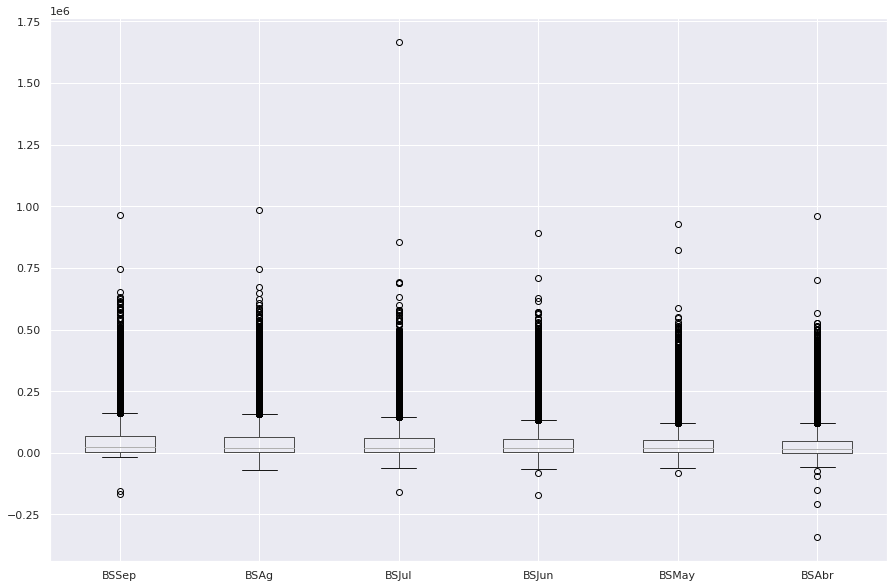

In [ ]:
ncdf2_num.boxplot(column= ['BSSep',	'BSAg',	'BSJul',	'BSJun',	'BSMay',	'BSAbr']) #Se grafica por separado de "bill statement" donde se puede apreciar que existen una cantidad importante de valores atípicos


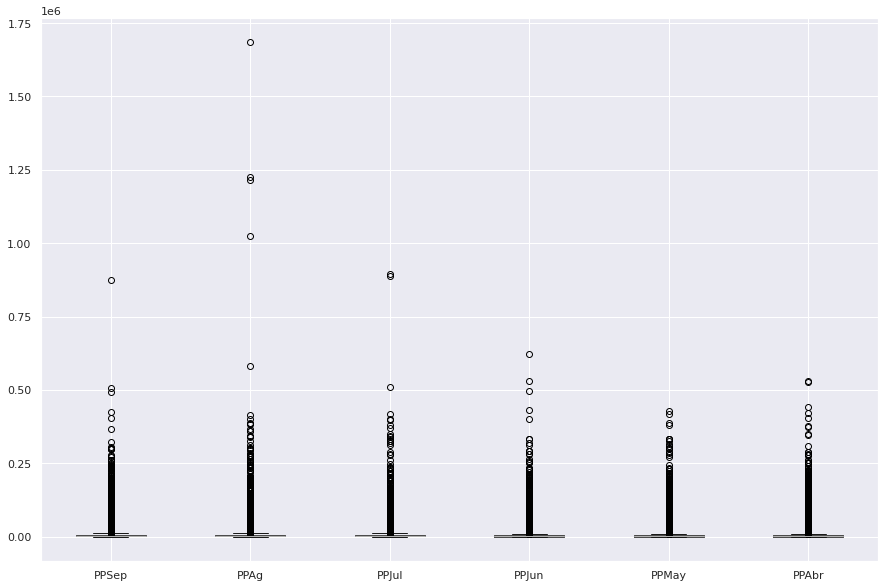

In [ ]:
ncdf2_num.boxplot(column= ['PPSep',	'PPAg',	'PPJul',	'PPJun', 	'PPMay',	'PPAbr']) #Se grafica por separado de "previous payment" donde se puede apreciar que existen una cantidad importante de valores atípicos


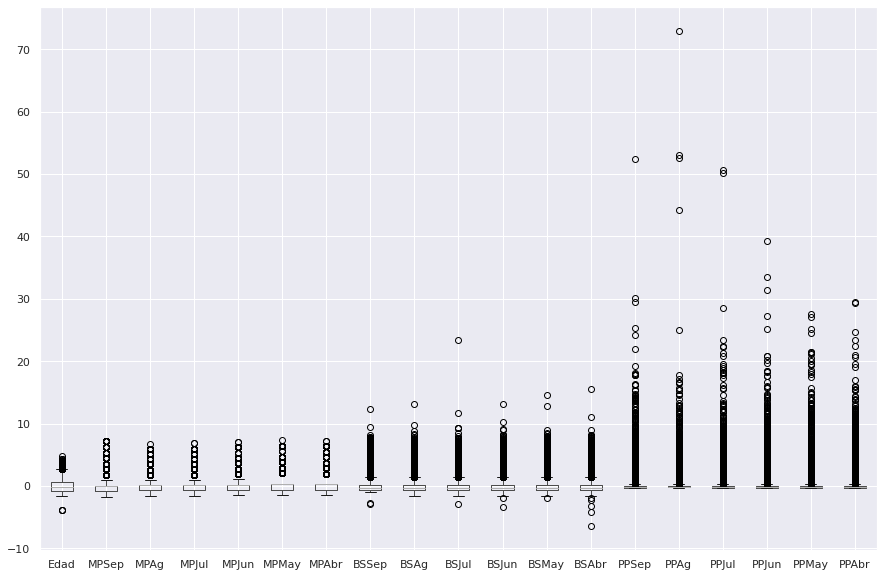

In [ ]:
scaled_ncdf2.boxplot() #Aqui se muestra en prespectiva todas las varibales que hemos utilizado en la reducción. 

In [ ]:
scaled_ncdf2.describe()


,Edad,MPSep,MPAg,MPJul,MPJun,MPMay,MPAbr,BSSep,BSAg,BSJul,BSJun,BSMay,BSAbr,PPSep,PPAg,PPJul,PPJun,PPMay,PPAbr
count,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04,2.999800e+04
mean,-3.524527e-16,1.136944e-17,3.979305e-17,4.453031e-17,-1.515926e-17,-2.463379e-17,4.926758e-17,-1.515926e-17,6.158448e-18,-2.463379e-17,-4.168795e-17,1.421180e-17,-1.989652e-17,1.894907e-18,1.279062e-17,1.894907e-17,-1.658044e-17,-7.105901e-19,-7.579628e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.846461e+00,-1.764887e+00,-1.558941e+00,-1.533218e+00,-1.522027e+00,-1.530221e+00,-1.486200e+00,-2.944141e+00,-1.671237e+00,-2.945404e+00,-3.314696e+00,-2.000616e+00,-6.354900e+00,-3.418433e-01,-2.569761e-01,-2.967377e-01,-3.080247e-01,-3.140892e-01,-2.933851e-01
25%,-8.109793e-01,-8.750426e-01,-7.236407e-01,-6.970493e-01,-6.665962e-01,-6.476296e-01,-6.165589e-01,-6.472922e-01,-6.490857e-01,-6.395212e-01,-6.363645e-01,-6.339646e-01,-6.316199e-01,-2.814658e-01,-2.208670e-01,-2.745868e-01,-2.893063e-01,-2.977919e-01,-2.868601e-01
50%,-1.605190e-01,1.480207e-02,1.116592e-01,1.391200e-01,1.888347e-01,2.349614e-01,2.530825e-01,-3.917322e-01,-3.931695e-01,-3.882121e-01,-3.764549e-01,-3.653070e-01,-3.660845e-01,-2.150504e-01,-1.697848e-01,-1.945029e-01,-2.122783e-01,-2.159123e-01,-2.090100e-01
75%,5.983513e-01,1.480207e-02,1.116592e-01,1.391200e-01,1.888347e-01,2.349614e-01,2.530825e-01,2.155334e-01,2.084220e-01,1.897276e-01,1.749404e-01,1.624111e-01,1.734950e-01,-3.959322e-02,-3.997438e-02,-4.088100e-02,-5.188714e-02,-5.025496e-02,-6.838468e-02
max,4.717933e+00,7.133560e+00,6.794058e+00,6.828474e+00,7.032281e+00,7.295689e+00,7.210214e+00,1.240237e+01,1.313289e+01,2.331672e+01,1.318575e+01,1.458652e+01,1.549453e+01,5.240111e+01,7.284044e+01,5.059572e+01,3.933098e+01,2.760280e+01,2.944414e+01


Para PC1 componente 1 la variable que mas contribuye es MPAg, que es el pago mensual de Agosto. Este variable no contiene el nivel de valores atípicos que contienen las otras variables. En este las variables que contienen menores aportes son las que tienen mayores niveles de valores atípicos. 

# **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

**¿Cuál es el número de componentes mínimo y por qué? ¿Cuál es la variación de los datos que representan esos componentes?**
Los componentes principales en este ejercicio se identifican de PC1-PC8 ya que logran su varianza acumulada a 85% de los datos. Estos significa que los primeros 8 componentes contienen gran cantidad de la variacion de datos que es posible que con 7 atributos ortogonales sea equivalente a las 16 variables/combinaciones lineales de atributos originales si no se hubiera elegido PCA.

Con este queda demostrado, para este caso, el beneficio de usar el PCA ya que ayuda a reducir de manera importante las variables sin perder mucha información. Es importante notar que la cantidad de valores atípicos genera que el modelo pueda estar sezgado y por ende se recomendaría que se eliminen los valores atípicos y se vuelva a recalcular los componentes. 

**¿Cuál es la pérdida de información después de realizar PCA?**

Despues de realizar PCA, la informacion que se pierde es la que es repetida, es decir variables correlacionadas que ya estan representadas por una de ellas. Esto lo podemos comprabar en la matriz de correlación donde observamos a varios elementos que estan correlacionados entre si. 

Como antes de hacer el analisis PCA se tiene que escalar la informacion se pierde la dimensionalidad de la información pero esto genera un mejor resultado del proceso de reducción que después es usado en los modelos de entrenamiento. 

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Los Componentes principales son: PC1 y PC2
 - Mayor importancia En el caso de PC1: MPAg, MPAbr, BSSept
 - Menor importancia En el caso de PC1: PPJul, PPAg, BSMay, MPJul

 - Mayor importancia En el caso de PC2: MPAg, MPAbr, BSSept
 - Menor importancia En el caso de PC2: PPMay, PPMay, PPJul


**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Se recomienda realizar PCA cuando se tienen muchas variables en un modelo y muchas de ellas se correlacionan entre si, esto genera la posibilidad de reducir las variables del modelo de manera significativa sin perder mucha información. Y mantener la informacion que es importante o de gran significancia para el modelo.

Este método permite seleccionar los componentes que tienen la varianza acumulada por encima de cierto valor definido, por ejemplo 90% de esta forma se puede contralar la cantidad de información que vamos a perder a nivel de variación vs la reducción de valores que vamos a lograr.

Un punto importante es que esta herramienta es muy sensible a la presencia de valores atípicos, esto genera que el modelo se distorsione y las reducciones también. Como se puede ver en este caso existen muchos valores atípicos en el modelo a pesar de haber usado la función "StandardScaler", lo que implica que estos deberían ser tratados antes de tener el modelo definitivo. 